In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast

import visualization
import data_collection

# Analysis of Song Popularity and Music Features Relations

This notebook contains analysis of different song metadata on a dataset, containing information about Billboard Hot 100 chart and spotify features of songs in the chart over the years.

In [5]:
hot_100 = pd.read_csv("data/filled_spotify.csv").drop("Unnamed: 0", axis=1)
hot_100.describe()

,peak_position,weeks_on_chart,year,track_duration_s,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spotify_popularity
count,31447.000000,31447.000000,31447.000000,27860.000000,27854.00000,27854.000000,27854.000000,27854.000000,27854.000000,27854.000000,27854.000000,27854.000000,27854.000000,27854.000000,27854.000000,27860.000000
mean,46.825007,10.965593,1988.734601,219.961120,0.60608,0.619178,5.222158,-8.523652,0.716737,0.079684,0.286768,0.031895,0.191981,0.591004,120.498104,42.479828
std,30.441584,8.550791,20.732369,67.461984,0.15407,0.195918,3.571184,3.572956,0.450591,0.089723,0.279443,0.135185,0.158176,0.240706,28.137940,22.806773
min,1.000000,1.000000,1958.000000,29.688000,0.00000,0.000581,0.000000,-37.326000,0.000000,0.000000,0.000002,0.000000,0.009670,0.000000,0.000000,0.000000
25%,19.000000,4.000000,1970.000000,175.106000,0.50500,0.481000,2.000000,-10.834000,0.000000,0.032600,0.044100,0.000000,0.092300,0.399000,99.048000,24.000000
50%,47.000000,9.000000,1986.000000,213.546000,0.61300,0.635000,5.000000,-7.993000,1.000000,0.042800,0.184000,0.000004,0.131000,0.607000,119.362500,45.000000
75%,73.000000,16.000000,2008.000000,251.927000,0.71600,0.773000,8.000000,-5.776000,1.000000,0.075600,0.491000,0.000385,0.248000,0.794000,137.324000,61.000000
max,100.000000,91.000000,2024.000000,3079.157000,0.98800,0.997000,11.000000,2.291000,1.000000,0.951000,0.996000,0.982000,0.999000,0.991000,241.009000,100.000000


In [6]:
yr = pd.read_csv("data/hot_100_spotify.csv")

In [7]:
yrs = yr.year

In [8]:
hot_100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31447 entries, 0 to 31446
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   song                31447 non-null  object 
 1   artist              31447 non-null  object 
 2   peak_position       31447 non-null  int64  
 3   weeks_on_chart      31447 non-null  int64  
 4   year                31447 non-null  int64  
 5   date                31447 non-null  object 
 6   spotify_genre       30429 non-null  object 
 7   track_duration_s    27860 non-null  float64
 8   explicit_track      27860 non-null  object 
 9   danceability        27854 non-null  float64
 10  energy              27854 non-null  float64
 11  key                 27854 non-null  float64
 12  loudness            27854 non-null  float64
 13  mode                27854 non-null  float64
 14  speechiness         27854 non-null  float64
 15  acousticness        27854 non-null  float64
 16  inst

In [9]:
hot_100.columns

Index(['song', 'artist', 'peak_position', 'weeks_on_chart', 'year', 'date',
       'spotify_genre', 'track_duration_s', 'explicit_track', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'spotify_popularity', 'main_artist', 'artist_list'],
      dtype='object')

## Correlations between different features

Not all songs have information for every feature. Lets plot a heatmap to see the correlations between all numerical features. By default the heatmap ignores NaN values, so we don't have to worry about them at the moment. Also lets inverse the columns showing the position for the song, as currently higher position is considered worse, because of the lower numerical value.

In [11]:
hot_100.peak_position = hot_100.peak_position * -1

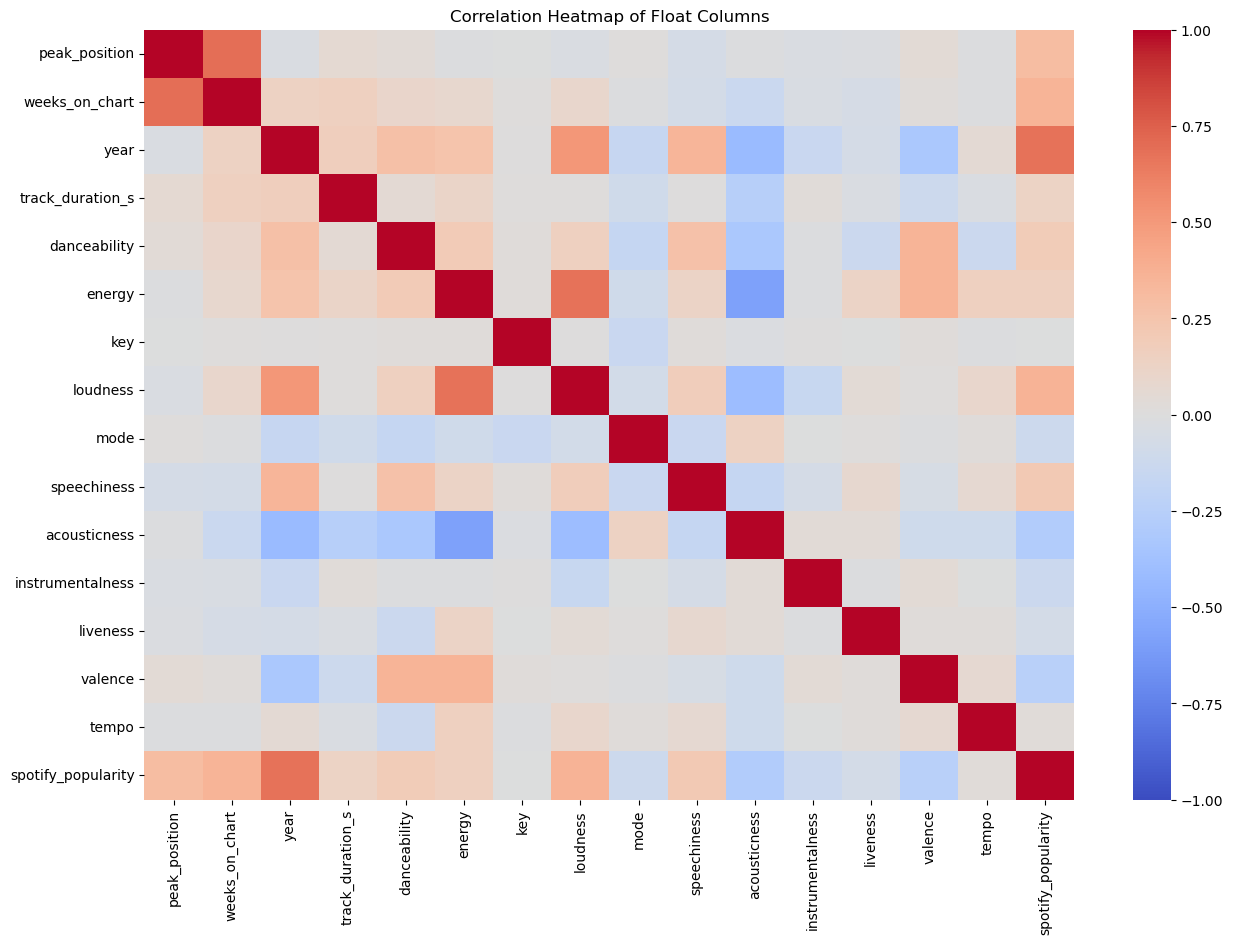

In [12]:
# Calculate the correlation matrix
hot_100_numerical = hot_100.select_dtypes(include = ['float', 'int'])
correlation_matrix = hot_100_numerical.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Float Columns')
plt.show()

In [13]:
hot_100_numerical.corr()

,peak_position,weeks_on_chart,year,track_duration_s,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spotify_popularity
peak_position,1.000000,0.693368,-0.024073,0.058804,0.032108,-0.014553,-0.006940,-0.029016,0.011427,-0.068776,-0.009032,-0.028070,-0.019439,0.044689,-0.010321,0.300002
weeks_on_chart,0.693368,1.000000,0.134504,0.152508,0.097134,0.083012,0.009904,0.092576,-0.014360,-0.073694,-0.138989,-0.038905,-0.056414,0.020301,-0.012535,0.353718
year,-0.024073,0.134504,1.000000,0.168315,0.276742,0.256708,0.006817,0.509863,-0.161533,0.346966,-0.426625,-0.142719,-0.068654,-0.326691,0.053937,0.674915
track_duration_s,0.058804,0.152508,0.168315,1.000000,0.054481,0.112870,0.008591,0.009758,-0.100771,0.003145,-0.253832,0.026448,-0.025922,-0.122929,-0.025970,0.128673
danceability,0.032108,0.097134,0.276742,0.054481,1.000000,0.198052,0.015962,0.154999,-0.165521,0.266963,-0.320546,-0.015363,-0.128675,0.355974,-0.131331,0.188126
energy,-0.014553,0.083012,0.256708,0.112870,0.198052,1.000000,0.023288,0.676633,-0.094811,0.120401,-0.580713,-0.011643,0.117440,0.353876,0.149714,0.156230
key,-0.006940,0.009904,0.006817,0.008591,0.015962,0.023288,1.000000,0.007119,-0.147239,0.018831,-0.018781,0.005101,-0.000575,0.021068,-0.012641,-0.002824
loudness,-0.029016,0.092576,0.509863,0.009758,0.154999,0.676633,0.007119,1.000000,-0.083992,0.176739,-0.412648,-0.148962,0.045028,0.007867,0.090697,0.363237
mode,0.011427,-0.014360,-0.161533,-0.100771,-0.165521,-0.094811,-0.147239,-0.083992,1.000000,-0.144245,0.134644,-0.005620,0.011895,-0.008913,0.015893,-0.120757
speechiness,-0.068776,-0.073694,0.346966,0.003145,0.266963,0.120401,0.018831,0.176739,-0.144245,1.000000,-0.164348,-0.066676,0.073012,-0.051016,0.065084,0.213378


#### Some interesting observations:

- As expected, positive correlations between chart poristion, weeks on chart and spotify popularity;
- Moderate correlation between spotify popularity and loudness. Loud songs tend to be more popular. Meanwhile there is a negative correlation between acousticness and popularity;
- Higher energy equates to higher loudness and valence;
- Valence and danceability are also correlated, however energy and danceability - not as much;
- Higher danceability, loudness, track duration and energy all lead to lower acousticness;
- Spotify popularity rises over the years - makes sense because newer popular songs tend to be listened more on spotify than old ones.
- Speechiness and loudness rises over the years, while valence and acousticness decreases.

## Most popular artists

Lets take a look at the most popular artists based on billboard charts and spotify popularity and see if they are mostly the same for both.

### Most popular artists on the Billboard Hot 100 chart

To find out which are the most popular artists on the chart, I will visualize the 15 artists who have the most songs that have charted, then see the artists with the highest average position, most weeks on the chart and highest spotify popularity. Lets see if these three criteria each paint a different picture.

Considering that some songs have featuring artists, it will be better to count the song as it belongs to all of the artists, performing it. I will make a visualization for both counting only the main artist and counting all artists.


In [17]:
hot_100.artist_list = hot_100.artist_list.apply(ast.literal_eval)
hot_100_expanded_artists = hot_100.explode('artist_list')

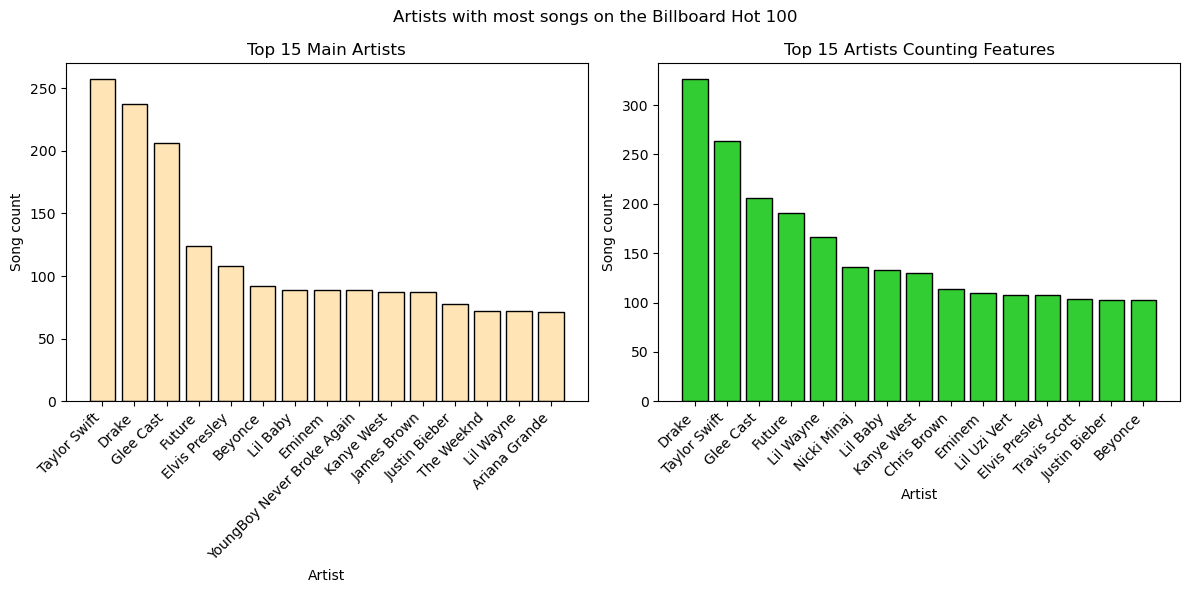

In [18]:
#Plot artists with most songs on the chart
main_artists_songs = hot_100.main_artist.value_counts()
expanded_artists_songs = hot_100_expanded_artists.artist_list.value_counts()
visualization.plot_popular_artists(
    main_artists_songs, expanded_artists_songs, name_y = "Song count", title = "Artists with most songs on the Billboard Hot 100", count = 15
)


The top four is the same both when counting features and not - Taylor Swift, Drake, Glee Cast (a popular TV musical show) and Future. For number of artists' own songs, Taylor Swift is first, but when we take into account the artist featuring in other's songs, Drake overtakes her. Many popular songs have a small rap part, performed by a rapper and many popular rap songs have more than one performer, which makes some rappers rise in position in the second chart - Lil Wayne, Lil Uzi Vert. Nicki Minaj and Travis Scott are not even in the top 15 when looking at only their own songs, as a big part of their chart performance is when they are featured on other artist's songs.

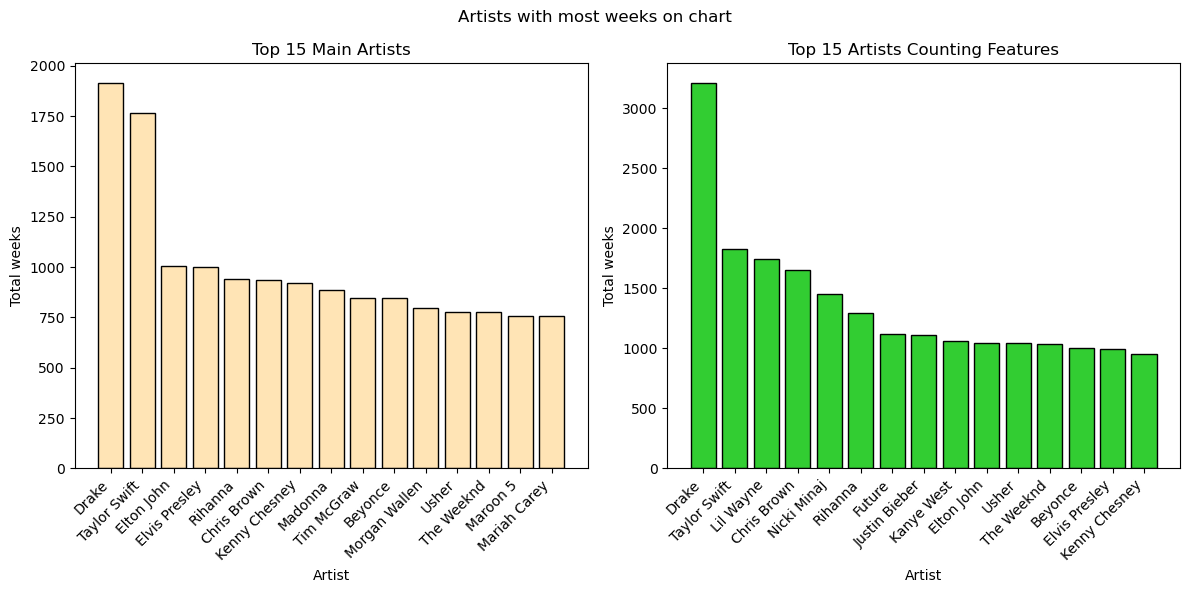

In [20]:
#Plot artists whose songs have spent the most weeks on charts
artists_most_weeks = hot_100.groupby('main_artist')['weeks_on_chart'].sum().sort_values(ascending = False)
artists_most_weeks_features = (
    hot_100_expanded_artists.groupby('artist_list')['weeks_on_chart'].sum().sort_values(ascending = False)
)
visualization.plot_popular_artists(
    artists_most_weeks, artists_most_weeks_features, name_y = "Total weeks", title = "Artists with most weeks on chart", count = 15
)

This visualizes the number of weeks all songs of each artist have spent on the chart in total. Drake and Taylor are again leading the chart both with just their songs and with features included, however Drake heavily outnumbers Taylor Swift when we take features into account, while Taylor's total weeks seem to not change at all, which is because she rarely features on other's songs. Madonna's position falls down a lot, as she is also an artist who is rarely featured on other's songs, while Nicki Minaj and Lil Wayne show up on the chart at a high position.

In [22]:
#Plot artists with the highest average spotify popularity per song, but only count ones with more than 30 songs
#30 is the needed data points for statistical significance
song_counts = hot_100.groupby('main_artist')['spotify_popularity'].count() #get the number of songs
above_30_songs = song_counts[song_counts > 30].index #Filter only artists with more than 30 songs

popularity_spotify = (hot_100[hot_100['main_artist'].isin(above_30_songs)]
                   .groupby('main_artist')['spotify_popularity']
                   .mean()
                   .sort_values(ascending=False))


#Do the same, while counting features
song_counts = hot_100_expanded_artists.groupby('artist_list')['spotify_popularity'].count() #get the number of songs
above_30_songs = song_counts[song_counts > 30].index #Filter only artists with more than 30 songs

popularity_with_features_spotify = (hot_100_expanded_artists[hot_100_expanded_artists['artist_list'].isin(above_30_songs)]
                   .groupby('artist_list')['spotify_popularity']
                   .mean()
                   .sort_values(ascending=False))

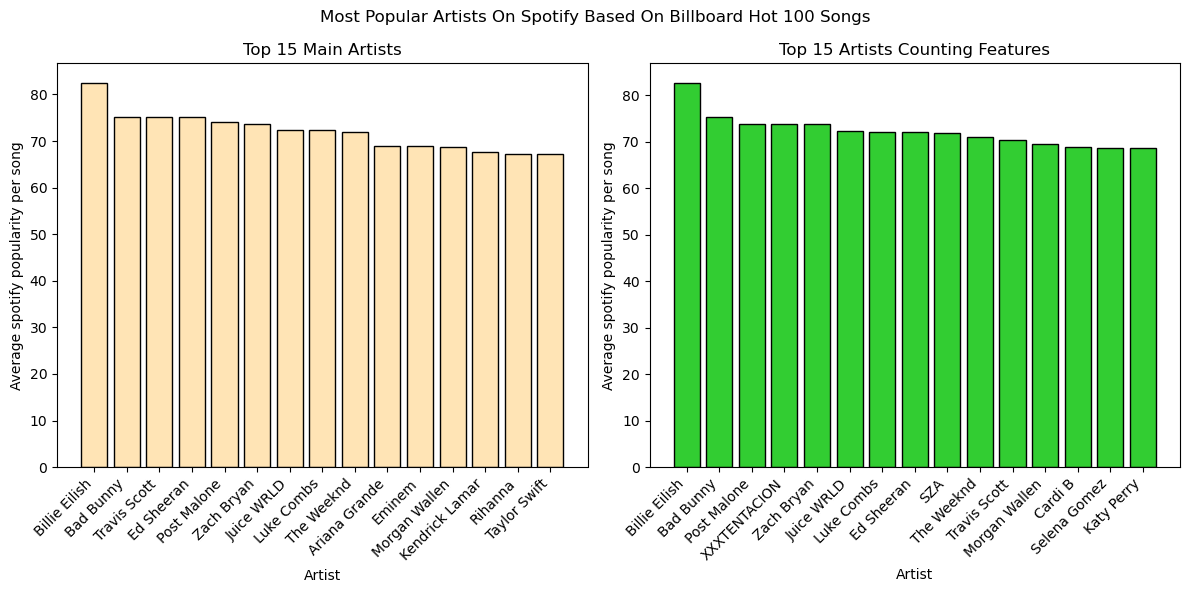

In [23]:
visualization.plot_popular_artists(
    popularity_spotify, popularity_with_features_spotify, 
    name_y = "Average spotify popularity per song", 
    title = "Most Popular Artists On Spotify Based On Billboard Hot 100 Songs", count = 15
)

Mostly the same names are in the top 15 again, however there is some difference in the positions of artists, leading the charts, and ones, leading in spotify for the same songs. In this one, Billie Eilish is a clear winner in both charts. She is a newer artist that got popular after spotify also became a lot more popular, so it makes sense that her songs' average spotify popularity will be higher.

Names like Drake and Taylor are in a little lower position here, mostly because of the sheer number of songs they have charted, leading the average spotify popularity down.

In [25]:
#Plot artists with the highest average position on the charts, again only for artists with more than 30 songs
song_counts = hot_100.groupby('main_artist')['peak_position'].count() #get the number of songs
above_30_songs = song_counts[song_counts > 30].index #Filter only artists with more than 30 songs

average_position = (hot_100[hot_100['main_artist'].isin(above_30_songs)]
                   .groupby('main_artist')['peak_position']
                   .mean()
                   .sort_values(ascending=False)) * -1


#Do the same, while counting features
song_counts = hot_100_expanded_artists.groupby('artist_list')['peak_position'].count() #get the number of songs
above_30_songs = song_counts[song_counts > 30].index #Filter only artists with more than 30 songs

average_position_features = (hot_100_expanded_artists[hot_100_expanded_artists['artist_list'].isin(above_30_songs)]
                   .groupby('artist_list')['peak_position']
                   .mean()
                   .sort_values(ascending=False)) * -1

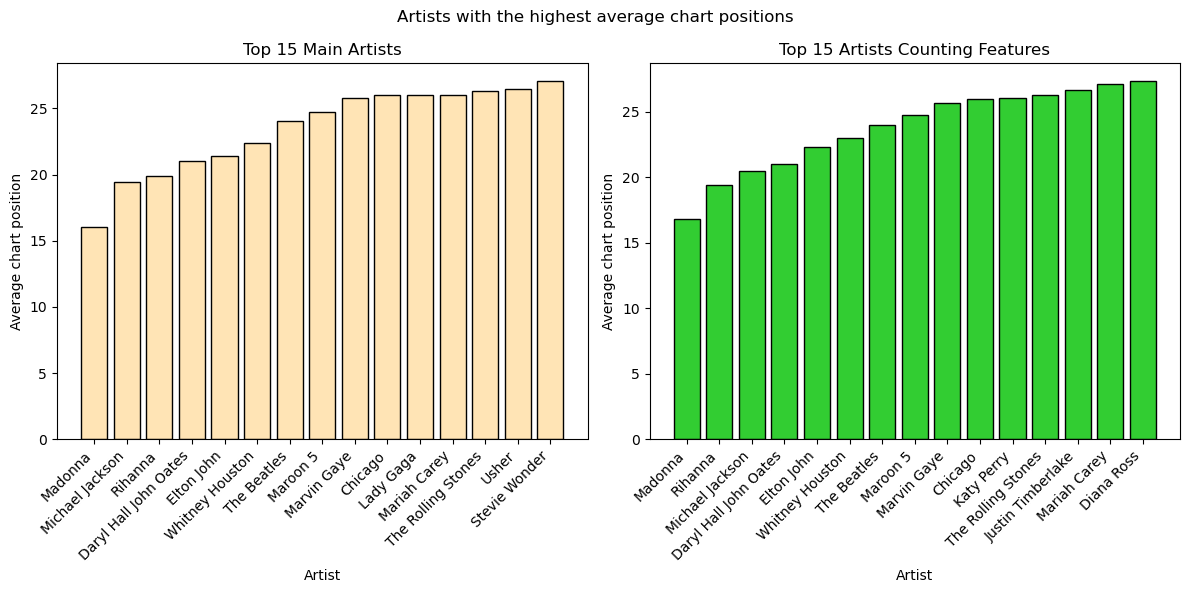

In [26]:
visualization.plot_popular_artists(
    average_position, average_position_features, 
    name_y = "Average chart position", 
    title = "Artists with the highest average chart positions", count = 15
)
plt.show()

When looking atthe artists with the highest average position on the charts, Madonna is a clear winner, followed by Michael Jackson and Rihanna. The artists when counting and not counting features are mostly the same with some small movement in their position.

## Genre Analysis

Lets perform some analysis on the genres, given to the songs, based on their performers' associated genres. Currently the genres feature is stored as a list. I will expand the dataset to contain a row for each genre of a song.

Lets see which are the genres, which are most common on the Billboard Hot 100. Then lets see how popular were some genres over the years.

In [29]:
hot_100.spotify_genre = hot_100.spotify_genre.dropna().apply(ast.literal_eval)
hot_100_expanded_genres = hot_100.explode('spotify_genre')
hot_100_expanded_genres = hot_100_expanded_genres.dropna(subset = 'spotify_genre')

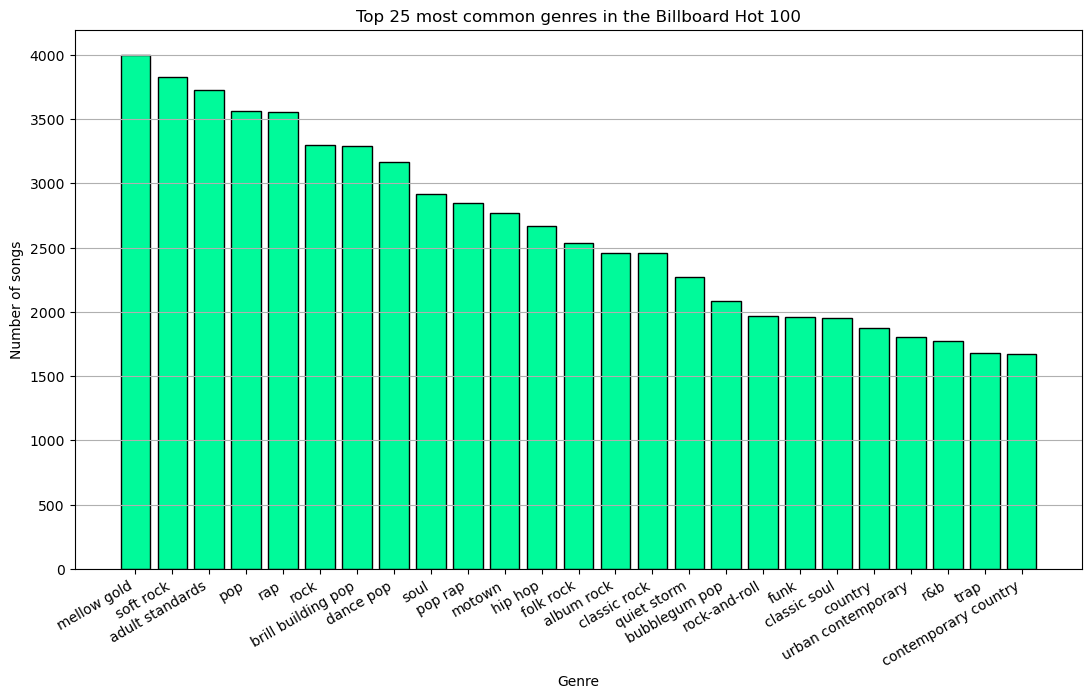

In [30]:
common_genres = hot_100_expanded_genres.spotify_genre.value_counts().head(25).to_dict()

plt.figure(figsize = (13, 7))
plt.bar(common_genres.keys(), common_genres.values(), color = 'mediumspringgreen', edgecolor = 'black')
plt.xlabel('Genre')
plt.ylabel('Number of songs')
plt.xticks(rotation = 30, ha = 'right')
plt.title('Top 25 most common genres in the Billboard Hot 100')
plt.grid(axis = 'y')
plt.gca()
plt.show()

### Genre chart pressence

The most common is 'mellow gold' - a style of music that blends alternative rock with folk, country, and lo-fi elements. Lets see how it performed over the years.

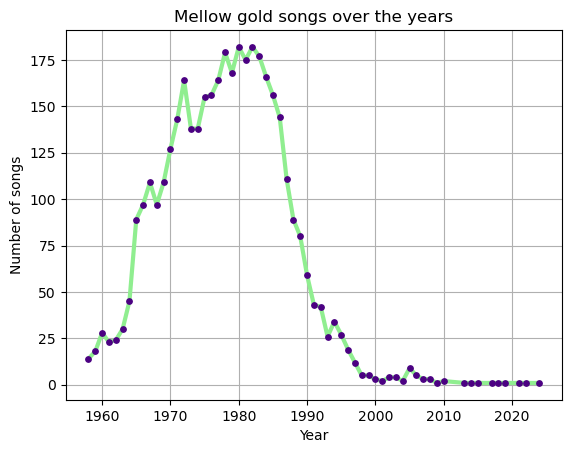

In [33]:
visualization.plot_genre_performance(hot_100_expanded_genres, "mellow gold")

We can see mellow gold started rising in popularity during the late 60s and lost it fast during the late 80s. This is about 20 years dominated by the genre. After the year 2000, mellow gold songs are very rare on the Billboard Hot 100.

In [35]:
visualization.period_avg_position(hot_100_expanded_genres, "mellow gold", 1965, 1990)

Average position for mellow gold songs during 1965-1990: 34.31


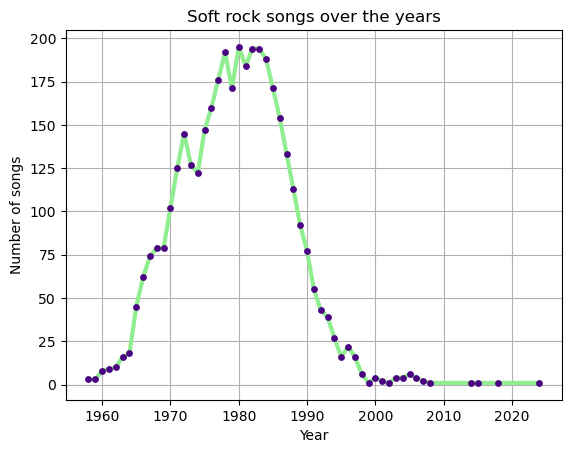

In [36]:
visualization.plot_genre_performance(hot_100_expanded_genres, "soft rock")

Soft rock genre was very popular during the 70s to 90s, then gradually dropped off and lost pretty much all its pressence in the charts by the year 2000

In [38]:
visualization.period_avg_position(hot_100_expanded_genres, 'soft rock', 1965, 1990)

Average position for soft rock songs during 1965-1990: 33.82


Adult standards primarily features a blend of pop, jazz, and big band music from the mid-20th century

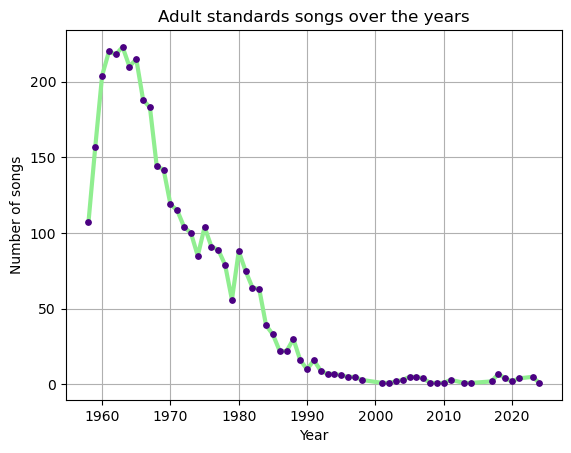

In [40]:
visualization.plot_genre_performance(hot_100_expanded_genres, "adult standards")

It reached its peak pressence in the charts during the mid 60s and started to gradually decrease after that. Its average position is a little lower compared to the previous two genres.

In [42]:
visualization.period_avg_position(hot_100_expanded_genres, 'adult standards', 1957, 1975)

Average position for adult standards songs during 1957-1975: 41.83


The total amount of disco songs is surprisingly low, considering how popular it used to be. Its pressence on the chart started to gradually rise from the 60s, peaked during the mid 70s and started declining after that.

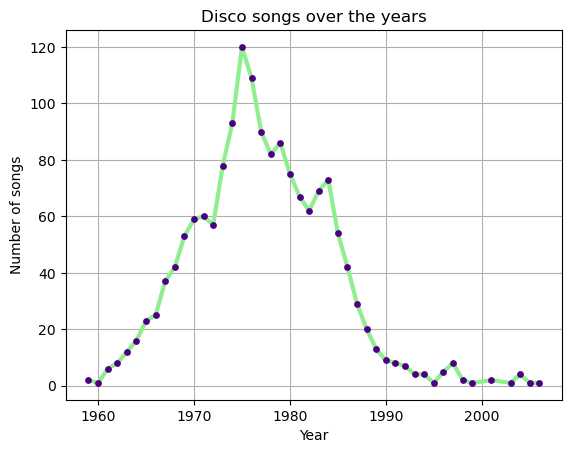

In [44]:
visualization.plot_genre_performance(hot_100_expanded_genres, "disco")

In [45]:
visualization.period_avg_position(hot_100_expanded_genres, 'disco', 1970, 1985)

Average position for disco songs during 1970-1985: 39.55


Finally, lets see the performance of the most popular genres nowadays - pop and rap

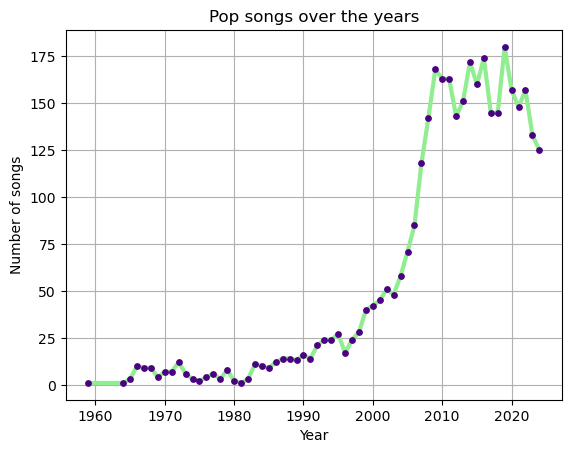

In [47]:
visualization.plot_genre_performance(hot_100_expanded_genres, "pop")

We can see pop starting to slowly rise during the 90s to early 2000s, then explode in popularity in the late 2000s.

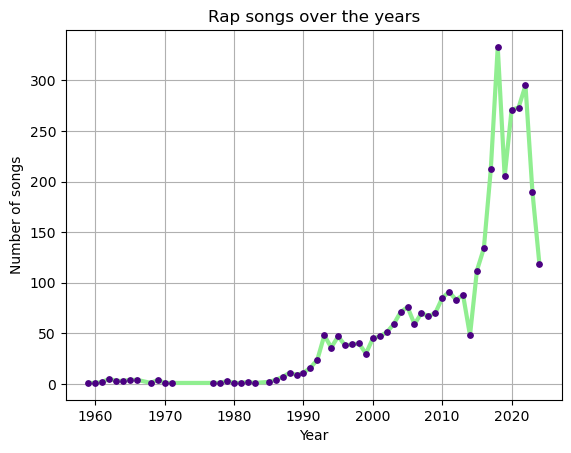

In [49]:
visualization.plot_genre_performance(hot_100_expanded_genres, "rap")

The rap genre started becoming popular in the early 90s, but exploded its chart pressence in the most recent years.

### Spotify features highest values

Next lets see which genres have the highest average values for the different spotify features. I will only take into account genres that have more than 100 songs for them in the dataset, so that only ones with significant statistical meaning will be used.

In [53]:
#Count occurrences of each genre
genre_counts = hot_100_expanded_genres.spotify_genre.value_counts()

#Filter genres with more than 100 values
valid_genres = genre_counts[genre_counts > 100].index
filtered_genres_df = hot_100_expanded_genres[hot_100_expanded_genres.spotify_genre.isin(valid_genres)]

In [54]:
filtered_genres_df.columns

Index(['song', 'artist', 'peak_position', 'weeks_on_chart', 'year', 'date',
       'spotify_genre', 'track_duration_s', 'explicit_track', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'spotify_popularity', 'main_artist', 'artist_list'],
      dtype='object')

In [55]:
cols_to_plot = [
    'explicit_track', 'danceability', 
    'energy', 'key', 'loudness', 'speechiness', 
    'acousticness', 'instrumentalness', 
    'liveness', 'valence', 
    'tempo','spotify_popularity'
]
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'yellow', 'olive']

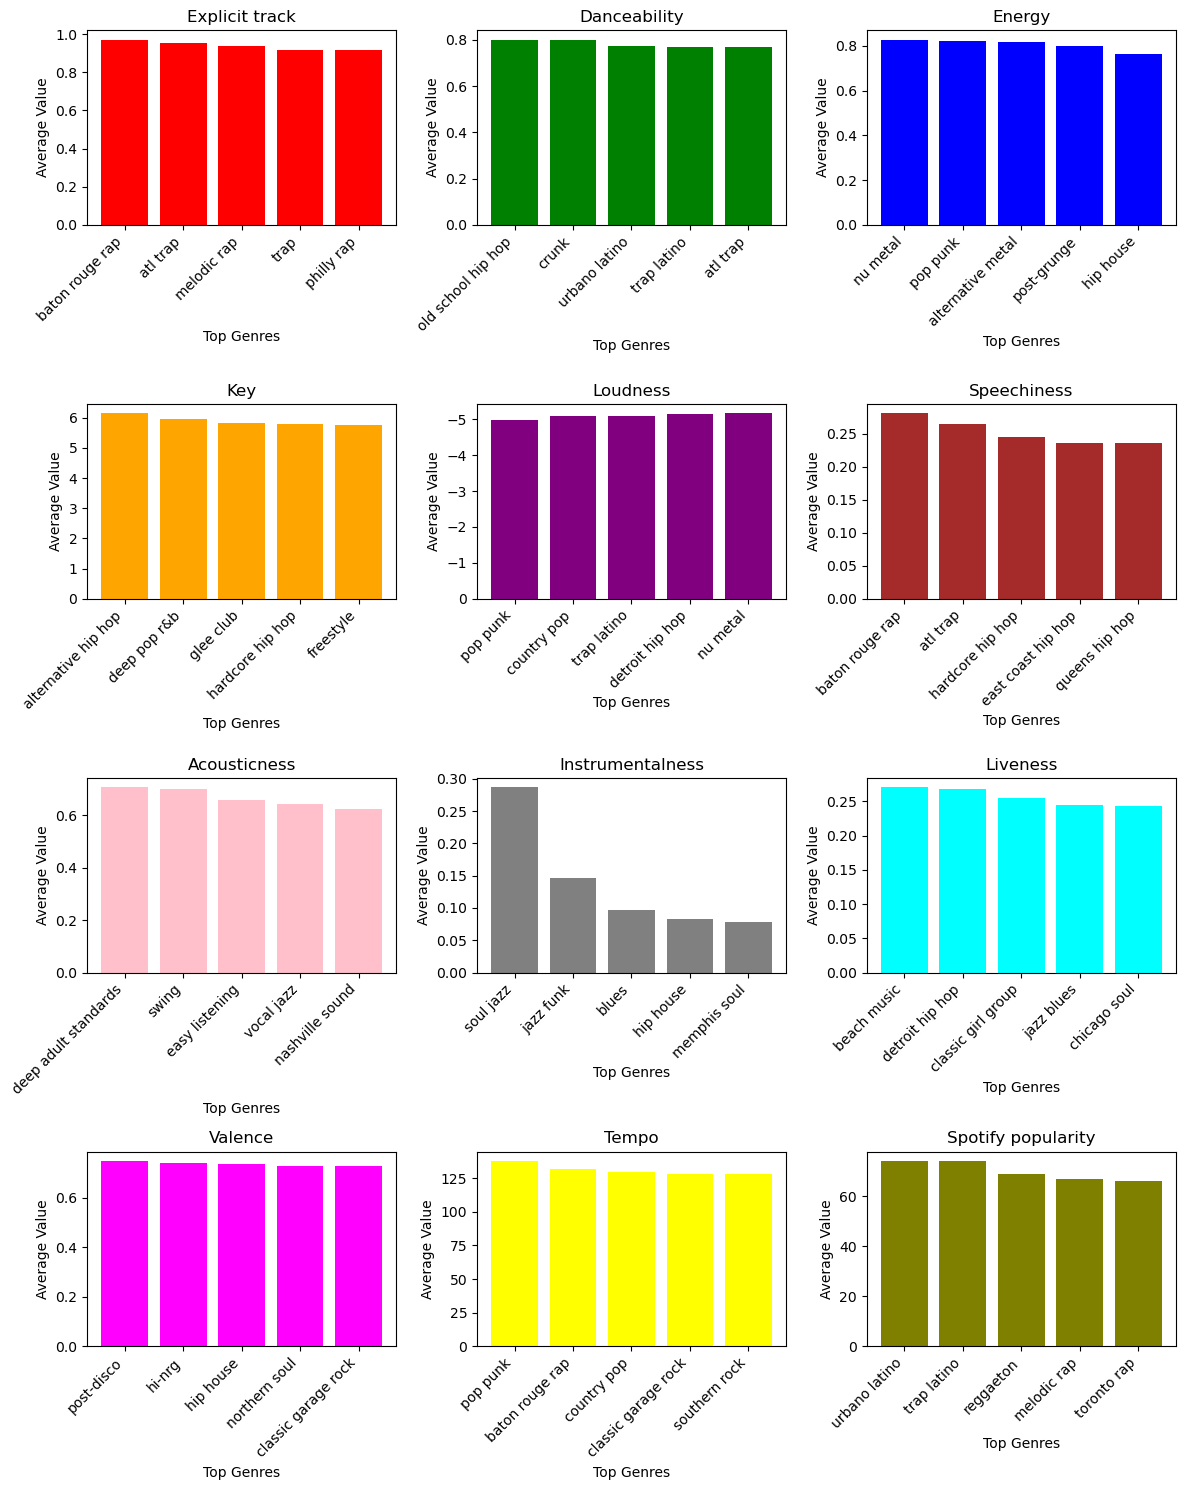

In [56]:
fig, axs = plt.subplots(4, 3, figsize=(12, 15))
for row in range(0, len(cols_to_plot), 3):
    for col in range(3):
        visualization.spotify_feature_subplot(axs[row // 3][col], filtered_genres_df, cols_to_plot[row + col], clr = colors[row + col])
plt.tight_layout()
plt.show()

#### Observations

* The `explicit_track` feature is a categorical value - either 1 or 0. This means that the displayed top 5 genres are the ones that have the highest percentage of explicit songs. These are, unsurprisingly, mostly rap subgenres, having a total of over 80% explicit songs each. 
* Hip hop, funk and rap subgenres, have the highest danceability (crunk is a subgenre of southern hip hop).
* Subgenres of rock, metal and punk have the highest average energy per track.
* Pop and metal are the loudest genres.
* Hip hop/rap are the genres with the highest speechiness - they usually say a lot of words, sometimes not following a beat like pop songs do.
* Genres that are more 'chill' have the highest acousticness. Deep adult-standards is a jazzy, balad heavy music, swing is a subgenre of jazz, nashville sound is a subgenre of country music.
* Soul jazz is the clear winner in terms of instrumentallness.
* Punk, pop, rock and rap have the highest tempo. 

### Highest charting genre

I want to take a look at which genre has the highest average position in the Billboard Hot 100 and see it's chart performance over the years. I want to do the same for some popular genres nowadays like pop and rap.

In [59]:
#Convert the chart positions to positive values again
filtered_genres_df.peak_position *= -1

C:\Users\ferad\AppData\Local\Temp\ipykernel_13876\1043335825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_genres_df.peak_position *= -1


In [60]:
highest_charting_genre = filtered_genres_df.groupby('spotify_genre').peak_position.mean().sort_values().head(1).to_dict()

In [61]:
highest_charting_genre 

{'girl group': 32.522167487684726}

In [62]:
genre, avg_position = next(iter(highest_charting_genre.items()))

Lets see how the number of songs for this genre over the years

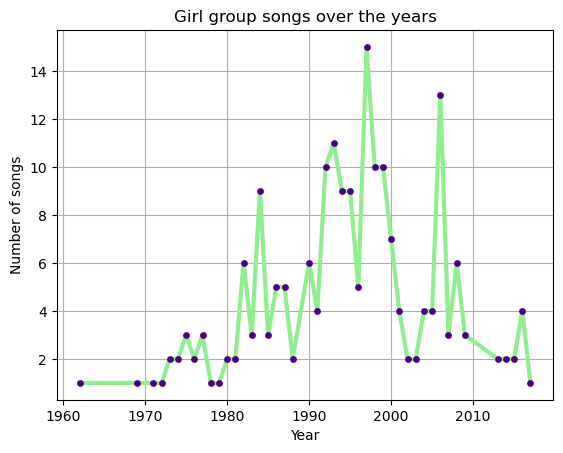

In [64]:
visualization.plot_genre_performance(hot_100_expanded_genres, genre)

Most of the songs for girl group music are between 1980 and 2010. Lets group the years to get a sum of number of songs for every 5 years, starting from 1978 to 2012, and then create a boxplot to showcase the chart performance.

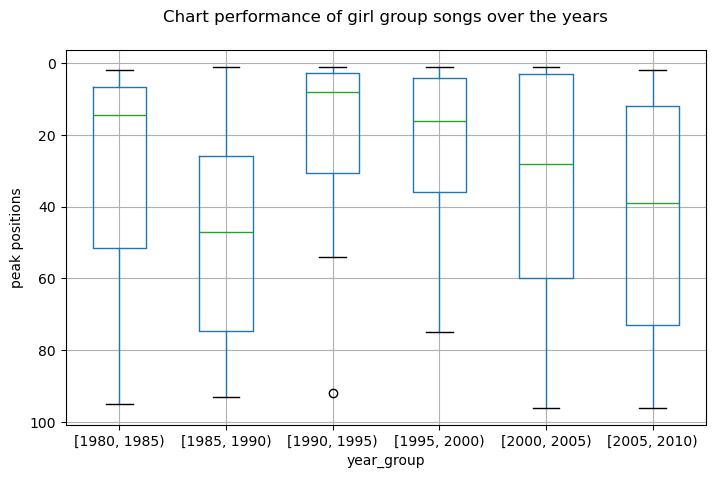

In [66]:
visualization.boxplot_chart_performance(filtered_genres_df, 'girl group', 1980, 2010, 5)

We can see that the period between 1990 to 2000 really was the peak for girl group music. It had both the best charting and the most songs. Even tho the result is visually appealing, there are too little girl group songs in total to actually make a bold statistical conclusion.

#### Pop chart performance

Considering pop became widely popular after the 2000s, I will take the years from 2000 to 2024, and split into groups of four year periods.

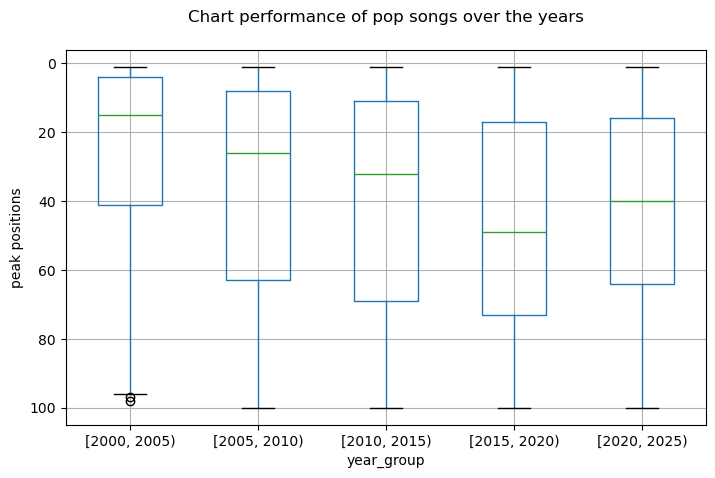

In [68]:
visualization.boxplot_chart_performance(filtered_genres_df, 'pop', 2000, 2025, 5)

We can see that pop music actually performed the best in the 2000-2005 year group, however that is likely due to the smaller number of songs. After that the performance decreases slowly over the following year groups, and has a slight increase in the most recent one - 2020-2025.

Pop music does have a lot of subgenres though, which were popular way before the type of music we call *pop* today. Lets see how pop performed over the years when taking its subgenres into account. I will do that by setting the `relative_genre_name` of the `boxplot_chart_performance` function to **True** and look at all years in intervals of 10

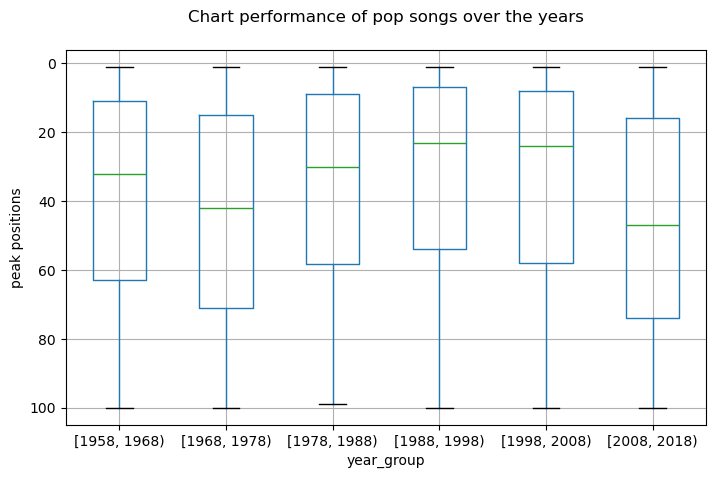

In [70]:
visualization.boxplot_chart_performance(filtered_genres_df, 'pop', interval = 10, relative_genre_name = True)

This doesn't give us much information, considering that the boxplot shows that for each year group the values range from 1 to 100, because of the big number of songs. We can only conclude that the songs performed generally around and above the higher half of the chart - top 50.

Finally, lets check pop music in the last 4 years.

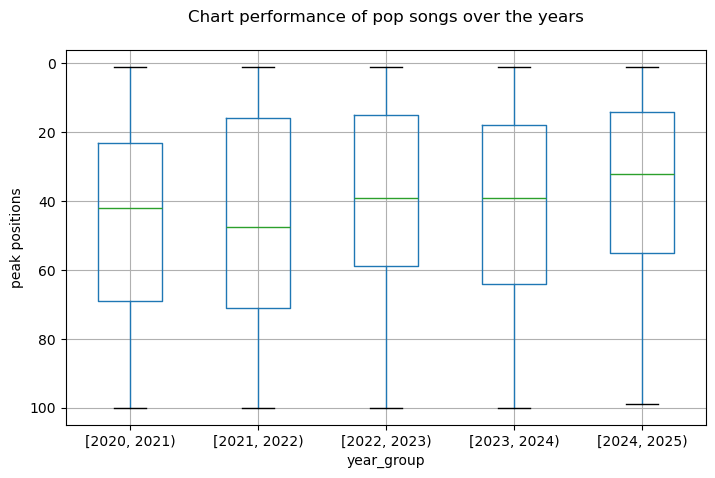

In [72]:
visualization.boxplot_chart_performance(filtered_genres_df, 'pop', 2020, 2025, 1)

Nothing spectacular, but the performance does seem to get a little bit better with each passing year.

#### Rap Chart Performance

Lets do the same three steps for the rap genre too - from 2000 to 2024, whole chart history, most recent 5 years.

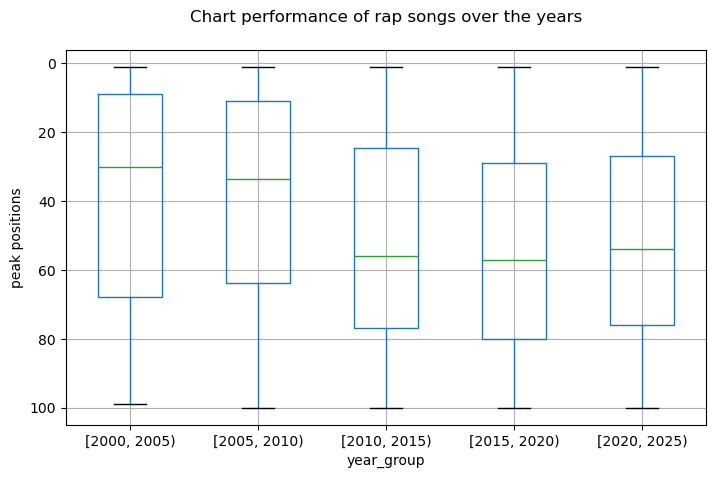

In [74]:
visualization.boxplot_chart_performance(filtered_genres_df, 'rap', start_year = 2000, end_year = 2025, interval = 5)

This shows a similar story to pop - it's performance is actually the best from 2000 to 2010, however likely due to the smaller sample size. Then follows a decrease until 2020 and then again a small increase in the most recent years.

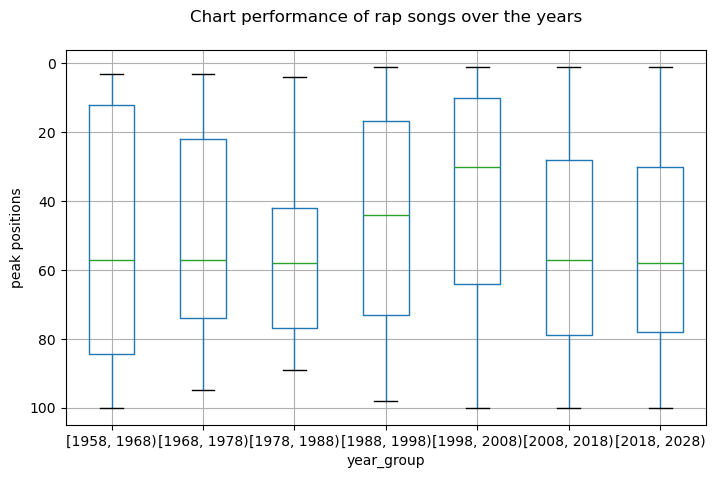

In [76]:
visualization.boxplot_chart_performance(filtered_genres_df, 'rap', end_year = 2028, interval = 10, relative_genre_name = True)

When looking at all subgenres of rap over the entire chart hisroty, we can see a rap song hasn't hit number one for more than 30 years of the chart's existence. After 1988 all year groups have songs reaching number one.

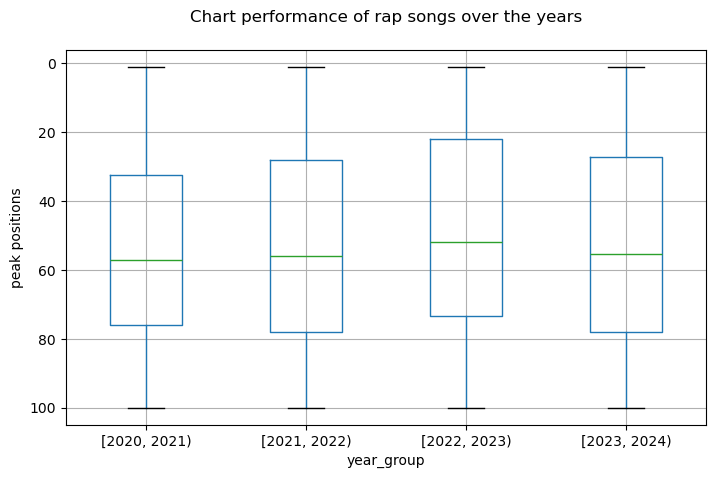

In [78]:
visualization.boxplot_chart_performance(filtered_genres_df, 'rap',start_year = 2020, end_year = 2024)

Here the distribution is pretty much the same over the years with only slight differences. Nothing interesting.

#### Explicitness over the years

Last thing I want to check is the percentage of songs that are explicit over the years. I will group the `hot_100` dataframe by year and get the mean of the `explicit_track` feature, which will represent the percentage of songs that are explicit. Then I will plot the result.

In [191]:
explicit_over_years = hot_100.groupby('year').explicit_track.mean()
explicit_over_years

year
1958         0.0
1959         0.0
1960         0.0
1961         0.0
1962         0.0
          ...   
2020    0.656394
2021     0.59069
2022    0.635922
2023    0.563923
2024    0.524173
Name: explicit_track, Length: 67, dtype: object

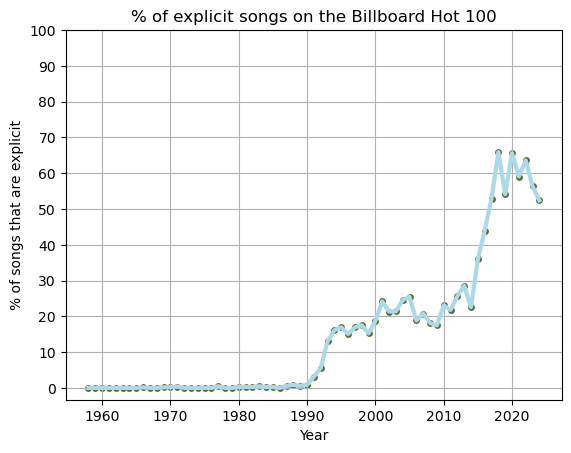

In [203]:
plt.plot(explicit_over_years.index, explicit_over_years.values * 100, color = 'lightblue', linewidth = 3)
plt.scatter(explicit_over_years.index, explicit_over_years.values * 100, s = 15, color = 'darkolivegreen')

plt.xlabel("Year")
plt.ylabel("% of songs that are explicit")
plt.title("% of explicit songs on the Billboard Hot 100")
plt.yticks(range(0,101,10))
plt.grid()

There were barely any explicit songs up until 1990. After that, we see a moderate rise during the period of 19190 to 2010, reaching up to 20-25%. Then we get a meteoric rise of explicit songs on the chart during the mid 2010s. Some of the most recent years have over 60% explicit songs, which is 3 times as much compared to the period before that. Artists really love to use vulgar words nowadays.